In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) В ноутбуці завантаж таблицю з файлу applications.csv в Pandas DataFrame та почисти дані

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('K:/Data Analitics learning/Python/data set for HW6/applications.csv')
df.head(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [4]:
df.describe()

,Amount,Age,External Rating
count,13272.000000,13315.000000,13243.000000
mean,9034.665913,29.318288,4.882202
std,6168.343738,6.031209,3.738651
min,150.000000,14.000000,0.000000
25%,3900.000000,25.000000,2.000000
50%,7800.000000,29.000000,4.000000
75%,12900.000000,33.000000,7.000000
max,58500.000000,63.000000,15.000000


In [5]:
df.shape

(13315, 10)

In [6]:
df.columns

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')

In [7]:
df.dtypes

Applied at          object
Amount             float64
Age                  int64
Gender              object
Industry            object
Marital status      object
External Rating    float64
Education level     object
Location            object
applicant_id        object
dtype: object

Прибери дублікати applicant_id

In [8]:
# df = df.drop_duplicates(subset='id')
df = df.drop_duplicates(subset='applicant_id')
df.shape

(13278, 10)

В полі 'External Rating' заповни відсутні значення нулями

In [9]:
# Рахуємо кількість NaN у стовбчику 'External Rating'
df['External Rating'].isna().sum()

72

In [10]:
# Використовуваєм метод fillna()
df['External Rating'] = df['External Rating'].fillna(0)

In [11]:
# перевіряєм
df['External Rating'].isna().sum()

0

В полі 'Education level' заповни відсутні значення текстом “Середня”

In [12]:
# Рахуємо кількість NaN у стовбчику 'Education level'
df['Education level'].isna().sum()

33

In [13]:
df['Education level'].unique()

array(['Вища (бакалавр, спеціаліст, магістр)', 'Ще студент вишу',
       'Середня спеціальна', 'Середня', 'Дві вищі', nan], dtype=object)

In [14]:
# Використовуваєм метод fillna()
df['Education level']= df['Education level'].fillna('Середня')

In [15]:
# перевірка перша
df['Education level'].isna().sum()

0

In [16]:
# перевірка друга  - що дані відновились і записались в таблиці
display(df['Education level'].unique(), df['External Rating'].unique())

array(['Вища (бакалавр, спеціаліст, магістр)', 'Ще студент вишу',
       'Середня спеціальна', 'Середня', 'Дві вищі'], dtype=object)

array([ 8.,  3.,  4.,  0.,  6.,  1.,  2.,  5., 10., 11.,  7., 15., 12.,
        9., 14., 13.])

Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій

In [17]:
# для зручності перейміновуємо датафрейм
app = df
app.head(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [18]:
# завантажуємо файл industries.csv
indus = pd.read_csv('K:/Data Analitics learning/Python/data set for HW6/industries.csv')
display(indus.head(5),indus.dtypes)

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


Industry    object
Score        int64
dtype: object

In [19]:
# джоінемо (inner join) по стовбчику 'Industry'
Merjed_df = pd.merge(indus, app, how='inner', on='Industry')
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id
0,Blockchain,0,11.30.2022 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,Blockchain,0,11.30.2022 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3
2,Blockchain,0,11.30.2022 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463
3,Blockchain,0,11.30.2022 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc
4,Blockchain,0,11.30.2022 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e


Розрахуй рейтинг заявки за наступними умовами:

Якщо вік заявщика між 35 та 55, до рейтингу додається 20 балів

In [20]:
Merjed_df.loc[(Merjed_df['Age'] >= 35) & (Merjed_df['Age'] <= 55), 'Score']+=20
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id
0,Blockchain,0,11.30.2022 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,Blockchain,0,11.30.2022 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3
2,Blockchain,0,11.30.2022 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463
3,Blockchain,20,11.30.2022 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc
4,Blockchain,20,11.30.2022 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e


Якщо заявка була подана не у вихідні, до рейтингу додається 20 балів

In [21]:
# перетворюємо в формат DATETIME
Merjed_df['Applied at'] = pd.to_datetime(Merjed_df['Applied at'], format='mixed')

In [22]:
Merjed_df["Applied at"].unique()

<DatetimeArray>
['2022-11-30 10:26:37', '2022-11-30 10:30:00', '2022-11-30 10:36:59',
 '2022-11-30 10:44:28', '2022-11-30 10:46:30', '2022-11-30 10:48:36',
 '2022-11-30 10:48:58', '2022-11-30 10:50:22', '2022-11-30 10:58:52',
 '2022-11-30 11:15:34',
 ...
 '2023-01-05 11:48:00', '2023-01-05 11:54:00', '2022-11-30 12:24:29',
 '2022-11-30 19:26:10', '2022-11-30 21:27:10', '2022-12-03 23:14:00',
 '2022-12-04 12:53:00', '2022-12-07 16:24:00', '2022-12-14 11:13:46',
 '2022-12-26 09:09:22']
Length: 10827, dtype: datetime64[ns]

In [23]:
Merjed_df['weekday'] = Merjed_df["Applied at"].dt.day_name()
Merjed_df['weekday'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [24]:
a=Merjed_df

In [25]:
# перевірка на день тижня та додавання баллів до SCORE
a.loc[(a['weekday'] == 'Wednesday')|(a['weekday'] == 'Thursday')|(a['weekday'] == 'Friday')|(a['weekday'] == 'Monday')|(a['weekday'] == 'Tuesday') , 'Score']+=20
a.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,20,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,20,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,20,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,40,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,40,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


In [26]:
Merjed_df=a
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,20,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,20,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,20,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,40,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,40,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


Якщо заявщик одружений, до рейтингу додається 20 балів

In [27]:
Merjed_df.loc[(Merjed_df['Marital status']=='Married'),'Score']+=20

In [28]:
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,20,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,20,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,20,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,40,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,60,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


Якщо заявщик знаходиться в Києві чи області, до рейтингу додається 10 балів

In [29]:
Merjed_df.loc[(Merjed_df['Location']=='Київ чи область'),'Score']+=10

In [30]:
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,20,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,20,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,30,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,50,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,60,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


Значення 'Score' з таблиці industries.csv також додається до заявки (і складає від 0 до 20 балів

In [ ]:
# це було зроблено спочатку так як використовувається колонка Score з початку вираховування рейтинга

Якщо 'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів

In [31]:
Merjed_df.loc[(Merjed_df['External Rating']>=7),'Score']+=20

In [32]:
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,40,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,20,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,50,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,70,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,60,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


Якщо 'External Rating' менше чи дорівнює 2, з рейтингу віднімається 20 балів

In [33]:
Merjed_df.loc[(Merjed_df['External Rating']<=2),'Score']-=20

In [34]:
Merjed_df.head()

,Industry,Score,Applied at,Amount,Age,Gender,Marital status,External Rating,Education level,Location,applicant_id,weekday
0,Blockchain,40,2022-11-30 10:26:37,12000.0,29,Чоловік,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,Wednesday
1,Blockchain,0,2022-11-30 10:30:00,NaN,22,Чоловік,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,Wednesday
2,Blockchain,50,2022-11-30 10:36:59,30000.0,29,Чоловік,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,Wednesday
3,Blockchain,70,2022-11-30 10:44:28,16050.0,50,Чоловік,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,Wednesday
4,Blockchain,40,2022-11-30 10:46:30,8550.0,40,Чоловік,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,Wednesday


В результуючій таблиці залиш лише заявки з рейтингом більше нуля, ці заявки вважатимуться прийнятими.

Рейтинг має бути числом від 0 до 100

In [35]:
Merjed_df=Merjed_df.loc[(Merjed_df['Score']>0)&(Merjed_df['Score']<=100)]

In [36]:
Merjed_df['Score'].unique()

array([ 40,  50,  70,  20,  30,  60,  10,  80,  90, 100,  15,  35,  55,
        85,  65,  95,  75,  45,  25,   5], dtype=int64)

Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю.

In [37]:
Merjed_df['Amount'].isna().sum()

31

In [38]:
Merjed_df['Amount'] = Merjed_df['Amount'].fillna(0)

In [39]:
Merjed_df.loc[(Merjed_df['Amount']==0) | (Merjed_df['External Rating']==0),'Score']=0

In [40]:
Merjed_df.shape

(12974, 12)

4) В результуючій таблиці залиш лише заявки з рейтингом більше нуля, ці заявки вважатимуться прийнятими.

In [41]:
Merjed_df=Merjed_df.loc[(Merjed_df['Score']>0)]

In [42]:
Merjed_df.shape

(12443, 12)

5)Дані з результуючої таблиці згрупуй за тижнем подачі заявки, та виведи на графік середній рейтинг прийнятих заявок у кожен тиждень.

In [ ]:
# df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta (7, unit='d')

In [43]:
Merjed_df['week'] = Merjed_df["Applied at"] - pd.to_timedelta (7, unit='d')

In [44]:
Merjed_df['week']

0       2022-11-23 10:26:37
2       2022-11-23 10:36:59
3       2022-11-23 10:44:28
4       2022-11-23 10:46:30
5       2022-11-23 10:48:36
                ...        
13272   2022-11-26 23:14:00
13273   2022-11-27 12:53:00
13275   2022-11-30 16:24:00
13276   2022-12-07 11:13:46
13277   2022-12-19 09:09:22
Name: week, Length: 12443, dtype: datetime64[ns]

In [45]:
# прибераємо години, хвилини та секунди з дати
Merjed_df['week'] = Merjed_df['week'].dt.normalize()

In [46]:
Merjed_df['week']

0       2022-11-23
2       2022-11-23
3       2022-11-23
4       2022-11-23
5       2022-11-23
           ...    
13272   2022-11-26
13273   2022-11-27
13275   2022-11-30
13276   2022-12-07
13277   2022-12-19
Name: week, Length: 12443, dtype: datetime64[ns]

In [47]:
# групуємо за тижнями
#df = df.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum()
    
a=Merjed_df.groupby([pd.Grouper(key='week', freq='W-MON')], as_index=False).mean('Score')

In [48]:
a.shape

(6, 5)

In [ ]:
a.shape

In [49]:
a.sort_values(by='week', ascending=True)

,week,Score,Amount,Age,External Rating
0,2022-11-28,50.066017,9962.884416,29.626407,5.244805
1,2022-12-05,49.499571,9165.573921,28.980841,4.896483
2,2022-12-12,48.471556,8812.365319,29.317341,4.884167
3,2022-12-19,46.710317,8121.833333,29.607143,4.868254
4,2022-12-26,50.763889,8777.776786,29.665675,5.054563
5,2023-01-02,50.976628,8533.302170,29.494157,5.033389


In [50]:
x=a

Text(0, 0.5, 'Score')

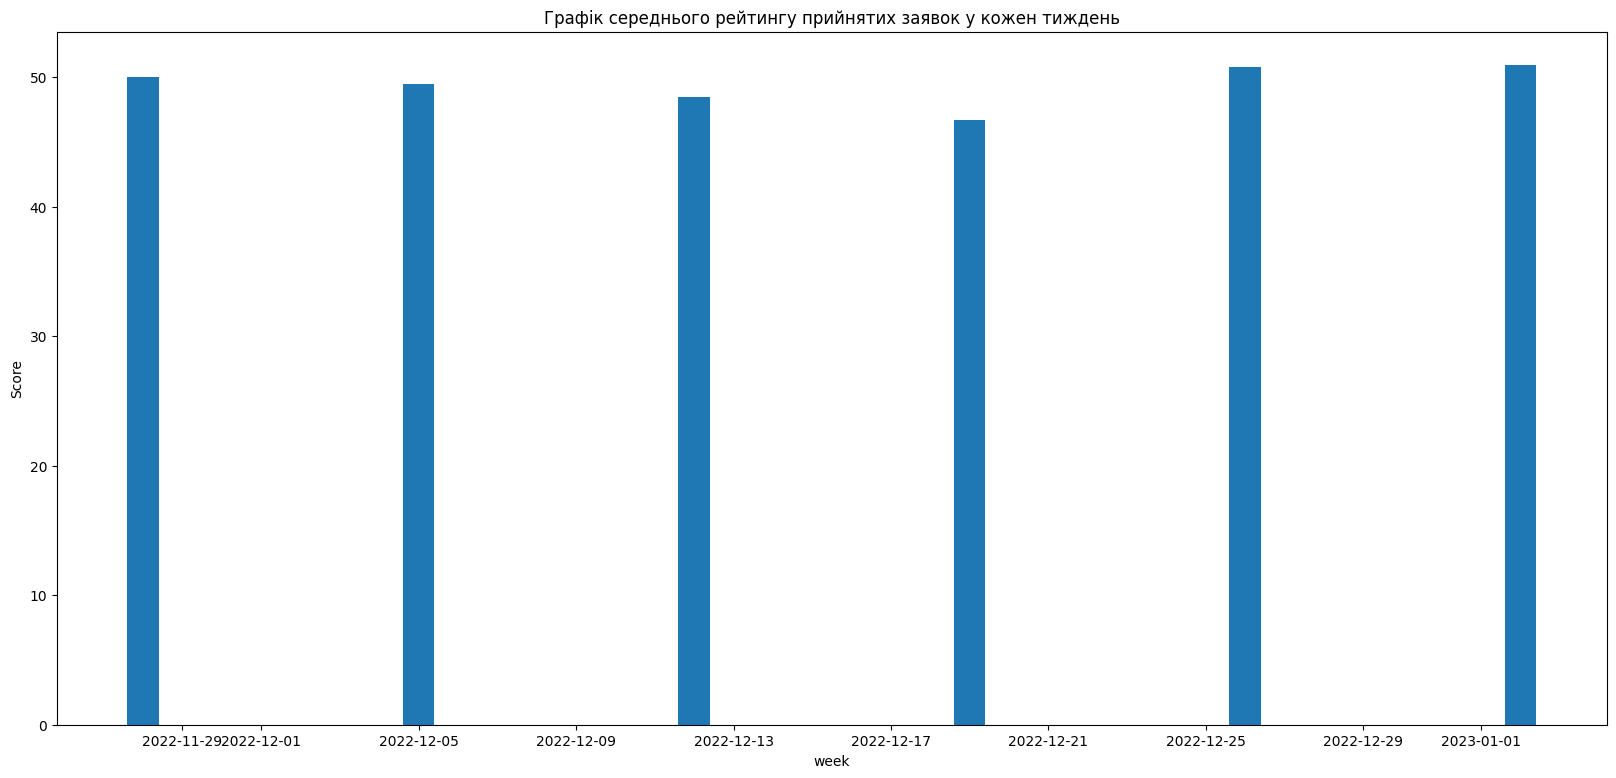

In [51]:
fig, ax = plt.subplots(figsize=(20, 9))

ax.bar(x["week"], x["Score"])
ax.set_title("Графік середнього рейтингу прийнятих заявок у кожен тиждень")
ax.set_xlabel("week")
ax.set_ylabel("Score")
# ax.grid()

# Поворачиваем подписи оси x на 45 градусов
#ax.set_xticklabels(x["week"], rotation=45)

end